In [1]:
from sympy import *
import numpy as np
import matplotlib.pyplot as plt
init_printing

<function sympy.interactive.printing.init_printing(pretty_print=True, order=None, use_unicode=None, use_latex=None, wrap_line=None, num_columns=None, no_global=False, ip=None, euler=False, forecolor=None, backcolor='Transparent', fontsize='10pt', latex_mode='plain', print_builtin=True, str_printer=None, pretty_printer=None, latex_printer=None, scale=1.0, **settings)>

In [2]:
x = Function('x')
t = Symbol('t')
w0 = Symbol('omega_0', positive=True, real=True)
w = Symbol('omega', positive=True, real=True)
x0 = Symbol('x_0', real=True)
v0 = Symbol('v_0', real=True)
b=Symbol('b', real=True)
A=Symbol('A', real=True)
x(t), t, w0, x0, v0

(x(t), t, omega_0, x_0, v_0)

In [3]:
eq_b = Eq(x(t).diff(t, t)+ 2*b*x(t).diff(t)+w0**2 * x(t), 0)
eq_b

Eq(2*b*Derivative(x(t), t) + omega_0**2*x(t) + Derivative(x(t), (t, 2)), 0)

In [4]:
dsolve(eq_b, x(t))

Eq(x(t), C1*exp(t*(-b + sqrt(b**2 - omega_0**2))) + C2*exp(-t*(b + sqrt(b**2 - omega_0**2))))

In [5]:
sol = dsolve(eq_b, x(t), ics={x(0): x0, x(t).diff(t).subs(t, 0): v0})
sol

Eq(x(t), (-b*x_0/(2*sqrt(b**2 - omega_0**2)) - v_0/(2*sqrt(b**2 - omega_0**2)) + x_0/2)*exp(-t*(b + sqrt(b**2 - omega_0**2))) + (b*x_0/(2*sqrt(b**2 - omega_0**2)) + v_0/(2*sqrt(b**2 - omega_0**2)) + x_0/2)*exp(t*(-b + sqrt(b**2 - omega_0**2))))

In [6]:
def move_sympyplot_to_axes(p, ax):
    backend = p.backend(p)
    backend.ax = ax
    backend._process_series(backend.parent._series, ax, backend.parent)  # backend.process_series() no longer works
    backend.ax.spines['right'].set_color('none')
    backend.ax.spines['bottom'].set_position('zero')
    backend.ax.spines['top'].set_color('none')
    plt.close(backend.fig)

In [7]:
eq_a = Eq(x(t).diff(t, t)+ 2*b*x(t).diff(t)+w0**2 * x(t), A*cos(w*t))
eq_a

Eq(2*b*Derivative(x(t), t) + omega_0**2*x(t) + Derivative(x(t), (t, 2)), A*cos(omega*t))

In [8]:
dsolve(eq_a, x(t))

Eq(x(t), 2*A*b*omega*sin(omega*t)/(4*b**2*omega**2 + omega**4 - 2*omega**2*omega_0**2 + omega_0**4) - A*omega**2*cos(omega*t)/(4*b**2*omega**2 + omega**4 - 2*omega**2*omega_0**2 + omega_0**4) + A*omega_0**2*cos(omega*t)/(4*b**2*omega**2 + omega**4 - 2*omega**2*omega_0**2 + omega_0**4) + C1*exp(t*(-b + sqrt(b**2 - omega_0**2))) + C2*exp(-t*(b + sqrt(b**2 - omega_0**2))))

In [9]:
sol2 = dsolve(eq_a, x(t), ics={x(0): x0, x(t).diff(t).subs(t, 0): v0})
sol2

Eq(x(t), 2*A*b*omega*sin(omega*t)/(4*b**2*omega**2 + omega**4 - 2*omega**2*omega_0**2 + omega_0**4) - A*omega**2*cos(omega*t)/(4*b**2*omega**2 + omega**4 - 2*omega**2*omega_0**2 + omega_0**4) + A*omega_0**2*cos(omega*t)/(4*b**2*omega**2 + omega**4 - 2*omega**2*omega_0**2 + omega_0**4) + (-A*b*omega**2/(8*b**2*omega**2*sqrt(b**2 - omega_0**2) + 2*omega**4*sqrt(b**2 - omega_0**2) - 4*omega**2*omega_0**2*sqrt(b**2 - omega_0**2) + 2*omega_0**4*sqrt(b**2 - omega_0**2)) - A*b*omega_0**2/(8*b**2*omega**2*sqrt(b**2 - omega_0**2) + 2*omega**4*sqrt(b**2 - omega_0**2) - 4*omega**2*omega_0**2*sqrt(b**2 - omega_0**2) + 2*omega_0**4*sqrt(b**2 - omega_0**2)) + A*omega**2*sqrt(b**2 - omega_0**2)/(8*b**2*omega**2*sqrt(b**2 - omega_0**2) + 2*omega**4*sqrt(b**2 - omega_0**2) - 4*omega**2*omega_0**2*sqrt(b**2 - omega_0**2) + 2*omega_0**4*sqrt(b**2 - omega_0**2)) - A*omega_0**2*sqrt(b**2 - omega_0**2)/(8*b**2*omega**2*sqrt(b**2 - omega_0**2) + 2*omega**4*sqrt(b**2 - omega_0**2) - 4*omega**2*omega_0**2*sqrt

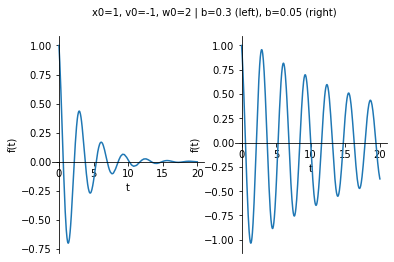

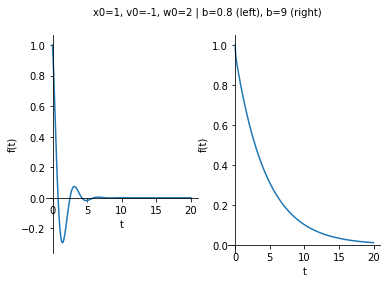

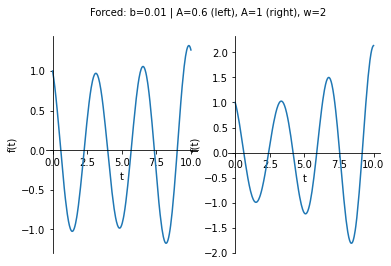

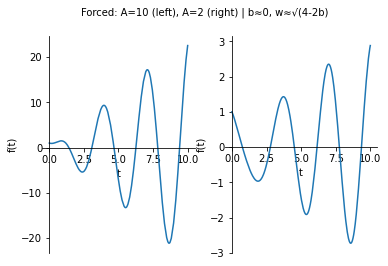

In [18]:
p1 = plot(sol.rhs.subs({x0: 1, v0: -1, w0: 2, b: 0.3}), (t, 0, 20), show=False)
p2 = plot(sol.rhs.subs({x0: 1, v0: -1, w0: 2, b: 0.05}), (t, 0, 20), show=False)
p3 = plot(sol.rhs.subs({x0: 1, v0: -1, w0: 2, b: 0.8}), (t, 0, 20), show=False)
p4 = plot(sol.rhs.subs({x0: 1, v0: -1, w0: 2, b: 9}), (t, 0, 20), show=False)

#force
p5 = plot(sol2.rhs.subs({x0: 1, v0: -1, w0: 2, b: 0.01, A: 0.6, w: 2}), (t, 0, 10), show=False)
p6 = plot(sol2.rhs.subs({x0: 1, v0: -1, w0: 2, b: 0.01, A: 1, w: 2}), (t, 0, 10), show=False)
p7 = plot(sol2.rhs.subs({x0: 1, v0: -1, w0: 2, b: 0.00001, A: 10, w: np.sqrt(4 - 2 * 0.01)}), (t, 0, 10), show=False)
p8 = plot(sol2.rhs.subs({x0: 1, v0: -1, w0: 2, b: 0.1, A: 2, w: np.sqrt(4 - 2 * 0.01)}), (t, 0, 10), show=False)

fig, (ax, ax2) = plt.subplots(ncols=2)
fig.suptitle("x0=1, v0=-1, w0=2 | b=0.3 (left), b=0.05 (right)", fontsize=10)
move_sympyplot_to_axes(p1, ax)
move_sympyplot_to_axes(p2, ax2)
plt.show()

fig, (ax, ax2) = plt.subplots(ncols=2)
fig.suptitle("x0=1, v0=-1, w0=2 | b=0.8 (left), b=9 (right)", fontsize=10)
move_sympyplot_to_axes(p3, ax)
move_sympyplot_to_axes(p4, ax2)
plt.show()

fig, (ax, ax2) = plt.subplots(ncols=2)
fig.suptitle("Forced: b=0.01 | A=0.6 (left), A=1 (right), w=2", fontsize=10)
move_sympyplot_to_axes(p5, ax)
move_sympyplot_to_axes(p6, ax2)
plt.show()

fig, (ax, ax2) = plt.subplots(ncols=2)
fig.suptitle("Forced: A=10 (left), A=2 (right) | b≈0, w≈√(4-2b)", fontsize=10)
move_sympyplot_to_axes(p7, ax)
move_sympyplot_to_axes(p8, ax2)
plt.show()


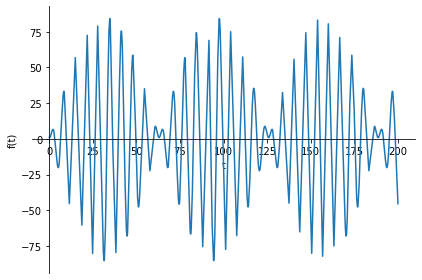

In [ ]:
# resonance
plot(sol2.rhs.subs({x0: 1, v0: -1, w0: 0.9, b: 0.00001, A:8, w:1 }), (t, 0, 200))


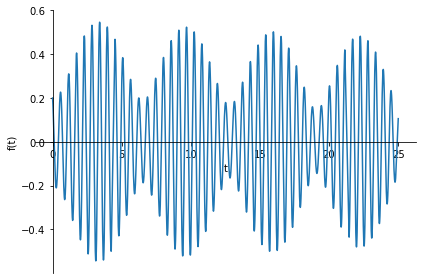

In [15]:
# resonance
plot(sol2.rhs.subs({x0: 0.2, v0: -1, w0: 11, b: 0.01, A:4, w:12 }), (t, 0, 25))


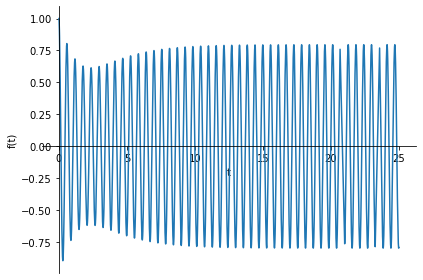

In [16]:
# resonance
plot(sol2.rhs.subs({x0: 1, v0: -1, w0: 11, b: 0.4, A:7, w:11 }), (t, 0, 25))
